In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
import statsmodels.api as sm

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

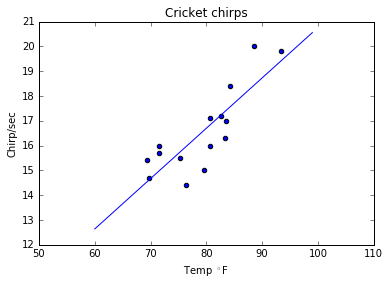

chirps/sec = tempF * 0.20299973140771355 + 0.4593146452359598
chirps/sec ≈ tempF/5
R^2 = 0.6922946529146998
Chirps @ 95 degrees: 19.744289128968745
Tempareature for 18 chirps/sec: 84.23479629930205 degress F


In [117]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
temp_to_chirps_model = linear_model.LinearRegression()
temp_to_chirps_model.fit(df[["Ground Temperature"]],df["Chirps/Second"])
plt.scatter(df["Ground Temperature"],df["Chirps/Second"])
plt.plot(range(60,100),temp_to_chirps_model.predict(np.array(range(60,100)).reshape(-1,1)))
plt.title("Cricket chirps")
plt.xlabel("Temp $^\circ$F")
plt.ylabel("Chirp/sec")
plt.show()
print("chirps/sec = tempF * {} + {}".format(temp_to_chirps_model.coef_[0],temp_to_chirps_model.intercept_))
print("chirps/sec " + u"\u2248" + " tempF/5")
print("R^2 = {}".format(temp_to_chirps_model.score(df[["Ground Temperature"]],df["Chirps/Second"])))
print("Chirps @ 95 degrees: {}".format(temp_to_chirps_model.predict(95)[0]))
chirps_to_temp_model = linear_model.LinearRegression()
chirps_to_temp_model.fit(df[["Chirps/Second"]],df["Ground Temperature"])
print("Tempareature for 18 chirps/sec: {} degress F".format(chirps_to_temp_model.predict(18)[0]))

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [124]:
df = pd.read_fwf("brain_body.txt")
brain_model = linear_model.LinearRegression()
brain_model.fit(df[['Body']],df.Brain)
print("brain = body * {} + {}".format(brain_model.coef_[0],brain_model.intercept_))

brain = body * 0.9029129477287058 + -56.8555454285964


This suggests that a small animal would have a brain with negative size, 

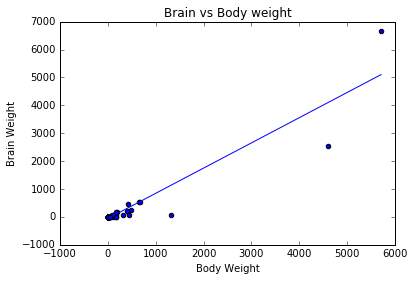

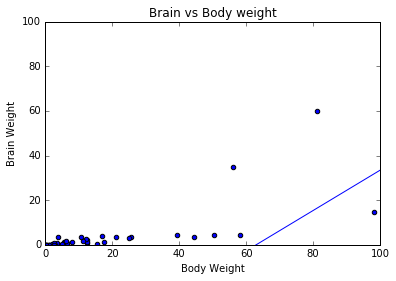

R² = 0.8726620843043331


In [158]:
plt.scatter(df.Body,df.Brain)
x_vals = np.linspace(df.Body.min(),df.Body.max(),5)
plt.plot(x_vals,brain_model.predict(x_vals.reshape(-1,1)))
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body weight")
plt.show()
plt.scatter(df.Body,df.Brain)
plt.plot(x_vals,brain_model.predict(x_vals.reshape(-1,1)))
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body weight")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()
print("R\u00b2 = {}".format(brain_model.score(df[['Body']],df.Brain)))

The negative brain size can be seen in this plot. Although the R<sup>2</sup> value is rather high.
This could be fixed by setting the intercept to 0, though that would not deal with the disparate magnitudes of the sampled data.

brain = body * 0.8856337418795703 + 0.0
R² = 0.8689479412027067


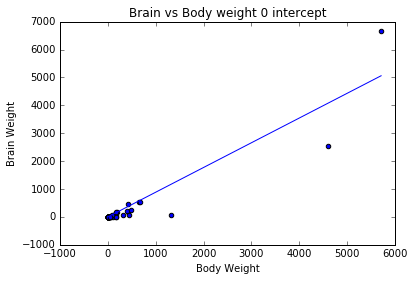

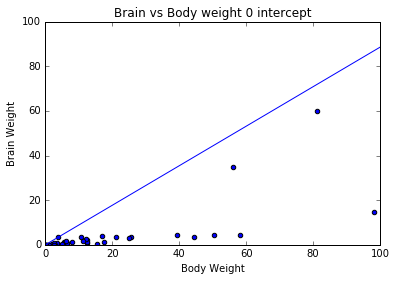

In [160]:
brain_model_0 = linear_model.LinearRegression(fit_intercept=False)
brain_model_0.fit(df[['Body']],df.Brain)
print("brain = body * {} + {}".format(brain_model_0.coef_[0],brain_model_0.intercept_))
print("R\u00b2 = {}".format(brain_model_0.score(df[['Body']],df.Brain)))
plt.scatter(df.Body,df.Brain)
plt.plot(x_vals,brain_model_0.predict(x_vals.reshape(-1,1)))
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body weight 0 intercept")
plt.show()
plt.scatter(df.Body,df.Brain)
plt.plot(x_vals,brain_model_0.predict(x_vals.reshape(-1,1)))
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body weight 0 intercept")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

The 0 intercept fixes the problem of negative brain size but the model is still driven by the handful of samples with large values rather than the large number of samples with smaller values.
A different model such as a log-log-linear model or a SVR model may handle this better.
## Log-log-linear

Log₁₀(brain) = Log₁₀(body * 1.224958021040329 + -1.0896759710007395)
R² = 0.9207837169027255


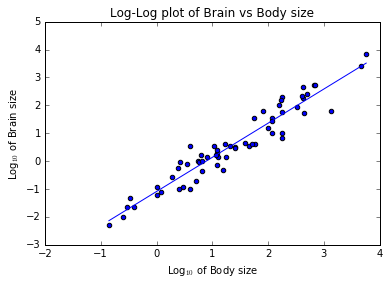

In [161]:
df_log = df.apply(np.log10)
log_brain_model = linear_model.LinearRegression()
log_brain_model.fit(df_log.Body.reshape(-1,1),df_log.Brain.reshape(-1,1))
plt.scatter(df_log.Body,df_log.Brain)
x_vals = np.linspace(df_log.Body.min(),df_log.Body.max(),500).reshape(-1,1)
print("Log" + u"\u2081\u2080" +"(brain) = Log" + u"\u2081\u2080"+"(body * {} + {})".format(log_brain_model.coef_[0][0],log_brain_model.intercept_[0]))
print("R\u00b2 = {}".format(log_brain_model.score(df_log[['Body']],df_log.Brain)))
plt.plot(x_vals,log_brain_model.predict(x_vals))
plt.xlabel("Log$_{10}$ of Body size")
plt.ylabel("Log$_{10}$ of Brain size")
plt.title("Log-Log plot of Brain vs Body size")
plt.show()

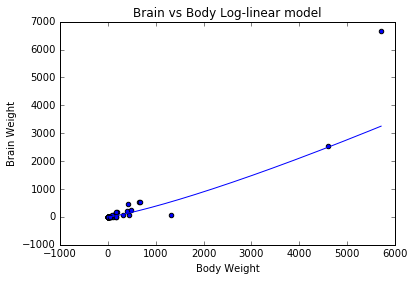

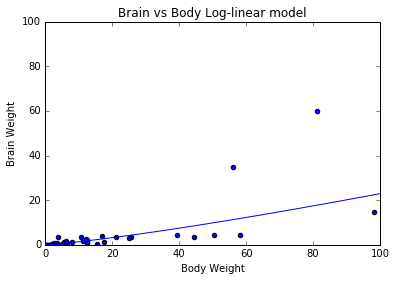

283.134193548
R² = 0.6430515850573552


In [184]:
exp_x_vals  = [10**x for x in x_vals]
exp_prediction = [10 ** x for x in log_brain_model.predict(x_vals)]
plt.scatter(df.Body,df.Brain)
plt.plot(exp_x_vals,exp_prediction)
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body Log-linear model")
plt.show()
plt.scatter(df.Body,df.Brain)
plt.plot(exp_x_vals,exp_prediction)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain vs Body Log-linear model")
plt.show()
y_bar = df.Body.mean()
s_tot = [(y - y_bar)**2 for y in df.Brain]
s_res = [(10**y - y_bar)**2 for y in log_brain_model.predict(df_log[['Body']])]
ss_tot = sum(s_tot)
ss_res = sum(s_res)[0]
rsq = 1 - (ss_res/ss_tot)
print("R\u00b2 = {}".format(rsq))

This seems like a better fit than either linear one despite the lower R<sup>2</sup> value. The uneven distribution of the samples appears to work against the suitability of R<sup>2</sup> as a metric for goodness of fit.

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [186]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [238]:
salary_model = linear_model.LinearRegression()
salary_model.fit(df[list(range(5))],df.Salary)
print("'Intercept', {}".format(salary_model.intercept_))
list(zip(df.columns[:-1],salary_model.coef_))

'Intercept', 11410.146547255601


[('Sex', 1241.7924996014331),
 ('Rank', 5586.1814495214448),
 ('Year', 482.85976782882358),
 ('Degree', -1331.6440634059177),
 ('YSdeg', -128.79057354486329)]

In [239]:
r_dict = {}
for l in range(1,6):
    for i in itertools.combinations(range(5),l):
        salary_submodel = linear_model.LinearRegression()
        salary_submodel.fit(df[list(i)],df.Salary)
        r_dict[i] = salary_submodel.score(df[list(i)],df.Salary)
print('R\u00b2 for single columns:\n')
for i in r_dict.keys():
    if len(i) == 1:
        print(df.columns[i[0]] + " : " + str(r_dict[i]))
print('\nMultiple columns:\n')
best_dict = {}
for i in r_dict.keys():
    if len(i) not in best_dict:
        best_dict[len(i)] = {"cols":i,"Rsq":r_dict[i]}
    elif r_dict[i] > best_dict[len(i)]["Rsq"]:
        best_dict[len(i)] = {"cols":i,"Rsq":r_dict[i]}
    elif r_dict[i] == best_dict[len(i)]["Rsq"]:
        print(i)
for i in best_dict.items():
    cols = ''
    for j in i[1]['cols']:
        cols = cols + df.columns[j] + ", "
    print("length : {}, R\u00b2 : {:0.4f}, cols : {}".format(i[0],i[1]['Rsq'],cols))

R² for single columns:

Sex : 0.0638989258329
Rank : 0.752536053927
Year : 0.490937026769
Degree : 0.00486168098475
YSdeg : 0.455428134584

Multiple columns:

length : 1, R² : 0.7525, cols : Rank, 
length : 2, R² : 0.8436, cols : Rank, Year, 
length : 3, R² : 0.8457, cols : Rank, Year, YSdeg, 
length : 4, R² : 0.8490, cols : Sex, Rank, Year, YSdeg, 
length : 5, R² : 0.8547, cols : Sex, Rank, Year, Degree, YSdeg, 


Sex has a poor R<sup>2</sup> on its own and does not improve significantly the R<sup>2</sup> of the model when added to it.
The coefficient of Sex is in fact positive, which represents an increase in salary for female professors.

In [224]:
df['const'] = 1
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
df_con = df[cols]
lin_mod = sm.OLS(df_con.Salary,df_con[list(range(6))])
res = lin_mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.13
Date:                Tue, 26 Apr 2016   Prob (F-statistic):           3.86e-18
Time:                        00:16:53   Log-Likelihood:                -474.78
No. Observations:                  52   AIC:                             961.6
Df Residuals:                      46   BIC:                             973.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.141e+04   1081.052     10.555      0.000      9234.101  1.36e+04
Sex         1241.7925    885.560      1.402      0.168      -540.747  3024.332
Rank        5586.1814    663.967      8.413      0.000      4249.685  6922.678
Year         482.8598     91.718      5.265      0.000       298.242   667.478
Degree     -1331.6441    992.854     -1.341      0.186     -3330.156   666.868
YSdeg       -128.7906     75.582     -1.704      0.095      -280.928    23.347
==============================================================================
Omnibus:                       26.336   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.754
Skew:                           1.482   Prob(JB):                     1.29e-12
Kurtosis:                       7.060   Cond. No.                         79.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

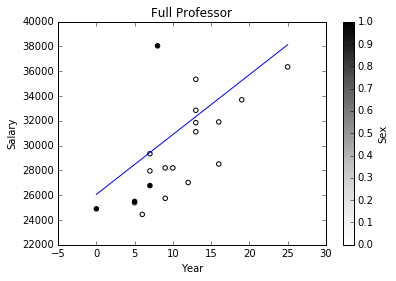

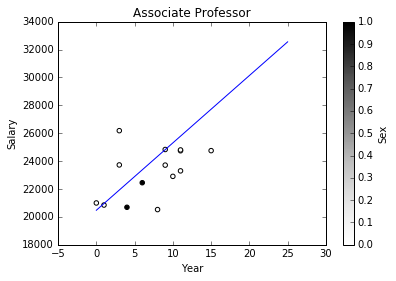

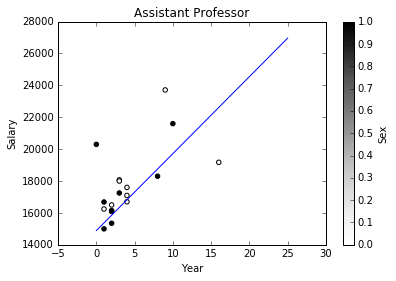

In [246]:
rank_dict = {1:"Assistant Professor",2:"Associate Professor",3:"Full Professor"}
for i in df.Rank.unique():
    df[df.Rank == i].plot(kind = "scatter",x = "Year", y = "Salary", c = "Sex", sharex = False)
    plt.plot([[0],[25]],salary_model.predict([[.5,i,0,.5,16],[.5,i,25,.5,16]]))
    plt.title(rank_dict[i])
    plt.show()
    "Sex", "Rank", "Year", "Degree", "YSdeg"

Pay for professors depends on rank and years at that rank to a far greater degree than sex. Female professors are more likely to be Assistant Professors and to have fewer years of experience and thus earn less money on average. The process of promoting professors was not a subject of this analyis and may or may not be fair based on Sex.